In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [125]:
def GetRandF(n_order):
    p = np.random.randn(n_order,2)
    def F(x):
        y = np.zeros(x.shape)
        for i in range(n_order):
            y += (p[i,0] * np.cos(i*np.pi*x) + p[i,1] * np.sin(i*np.pi*x))/(i+1)
        return y
    return F

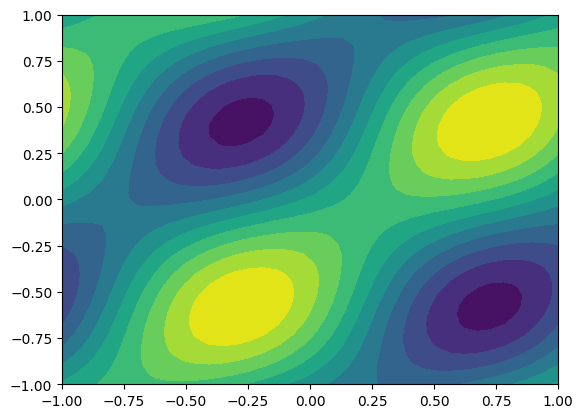

In [147]:
c = 1
n_order = 2
x = np.linspace(-1,1,38)
y = np.linspace(-1,1,38)
X,Y = np.meshgrid(x,y)
eta = X-c*Y
xi = X+c*Y
F = GetRandF(n_order)
G = GetRandF(n_order)
u = F(eta)+G(xi)
plt.contourf(X,Y,u,10)